<a href="https://colab.research.google.com/github/MuhamadAnang/PCVK/blob/main/week10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MODUL 10 – Thresholding, Segmentasi Sederhana

**Nama :** Muhamad Anang Abdullah Faqih

**Kelas :** D4 TI 3D

**NIM :** 2241720070


1. Buka https://colab.research.google.com/. Setelah dipastikan bahwa google Colab
terhubung dengan Github Anda, lanjutkan dengan memilih repository yang telah
digunakan pada praktikum minggu lalu, rename file menjadi “Week9.ipynb”.  

In [39]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


2. Import beberapa library berikut yang akan digunakan selama uji coba praktikum
minggu ke-6 berikut.

In [40]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

3. Buat Global Threshold (BINARY, BINARY_INV, TRUNC, TOZERO, TOZERO_INV), dengan
threshold= 170, secara manual sesuai dengan deskripsi dari grafik yang ditunjukkan di
atas

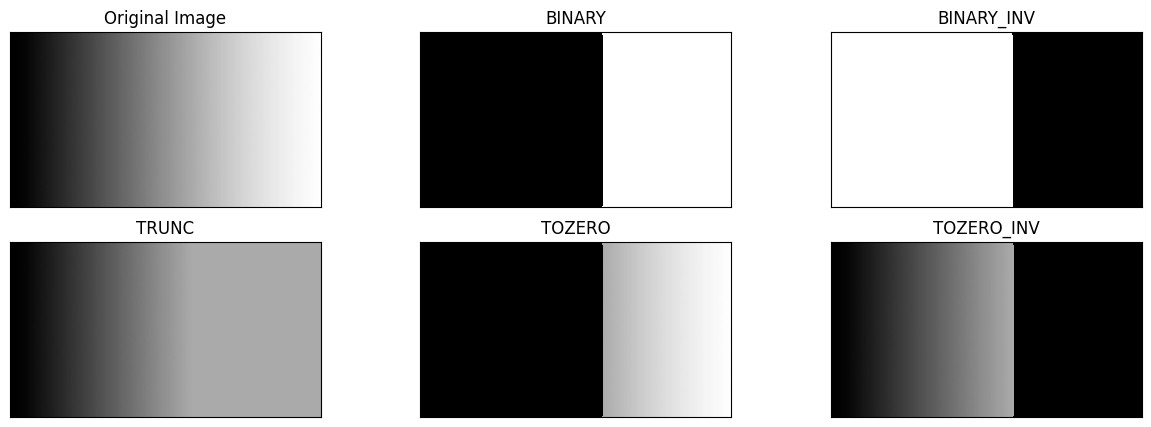

In [42]:
filename = ('/content/drive/MyDrive/Images/gradient.jpg')
img = cv.imread(filename)
thresh = 170

binary_threshold = np.where(img > thresh, 255, 0).astype(np.uint8)
binary_inverted_threshold = np.where(img < thresh, 255, 0).astype(np.uint8)
truncated_threshold = np.where(img > thresh, thresh, img).astype(np.uint8)
tozero_threshold = np.where(img > thresh, img, 0).astype(np.uint8)
tozero_inverted_threshold = np.where(img > thresh, 0, img).astype(np.uint8)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, binary_threshold, binary_inverted_threshold, truncated_threshold, tozero_threshold, tozero_inverted_threshold]

plt.figure(figsize=(15,5))
for i in range(len(images)):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i], 'gray', interpolation='nearest')
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])
plt.show()

4. Buat Otsu Thresholding tanpa menggunakan Library.

In [43]:
balloon = '/content/drive/MyDrive/Images/balloon.jpg'
image = cv.imread(balloon)
grayscale_img = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

In [44]:
def otsu_thresholding(image):
    hist, _ = np.histogram(image.flatten(), bins=256, range= [0, 256]) # Hitung Histogram

    total_pixel = image.size
    probability = hist / total_pixel # Hitung probabilitas

    global_men = np.sum(np.arange(256) * probability) # hitung rata rata global

    max_variance = 0
    optimal_threshold = 0


    for t in range(256):   # iterasi tiap threshold
      w0 = np.sum(probability[:t]) # kelas 1 dibawah threshold
      if w0 == 0:
        continue
      w1 = np.sum(probability[t:]) # kelas 2 di atas threshold
      if w1 == 0:
        break
    # kelas 1 rata rata
      mu0 = np.sum(np.arange(t) * probability[:t]) / w0
    # kelas 2 rata rata
      mu1 = np.sum(np.arange(t, 256) * probability[t:]) / w1

      variance = w0 * w1 * (mu0 - mu1) ** 2 # varians antar kelas

      if variance > max_variance: #pemilihan trheshold optimal
        max_variance = variance
        optimal_threshold = t
    return optimal_threshold

In [ ]:
otsu_threshold = otsu_thresholding(grayscale_img)

binary_image = (grayscale_img > otsu_threshold).astype(np.uint8) * 255
global_threshold = (grayscale_img > 90).astype(np.uint8) * 255



Menampilkan citra grayscale dan citra biner

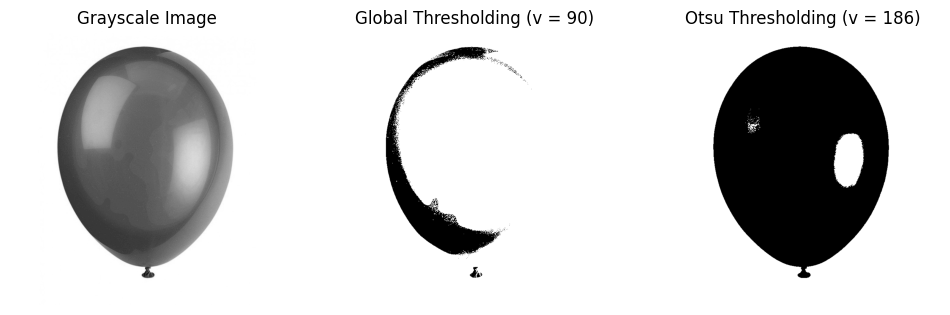

In [46]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(grayscale_img, cmap='gray')
plt.axis('off')
plt.title('Grayscale Image')

plt.subplot(1, 3, 2)
plt.imshow(global_threshold, cmap='gray')
plt.axis('off')
plt.title('Global Thresholding (v = 90)')

plt.subplot(1, 3, 3)
plt.imshow(binary_image, cmap='gray')
plt.axis('off')
plt.title('Otsu Thresholding (v = 186)')

plt.show()

5. Buat histogram dari citra tersegmentasi, Histogram hanya pada foreground image
saja. Gunakan image tobacco.jpg yang sudah disediakan di folder images.

In [53]:
tobacco = cv.imread('/content/drive/MyDrive/Images/tobacco.jpg')
tobacco = cv.cvtColor(tobacco, cv.COLOR_BGR2RGB)

r, g, b = cv.split(tobacco)
hist_r = cv.calcHist([r], [0], None, [256], [0, 256])
hist_g = cv.calcHist([g], [0], None, [256], [0, 256])
hist_b = cv.calcHist([b], [0], None, [256], [0, 256])

Menampilkan Citra dan Histogram

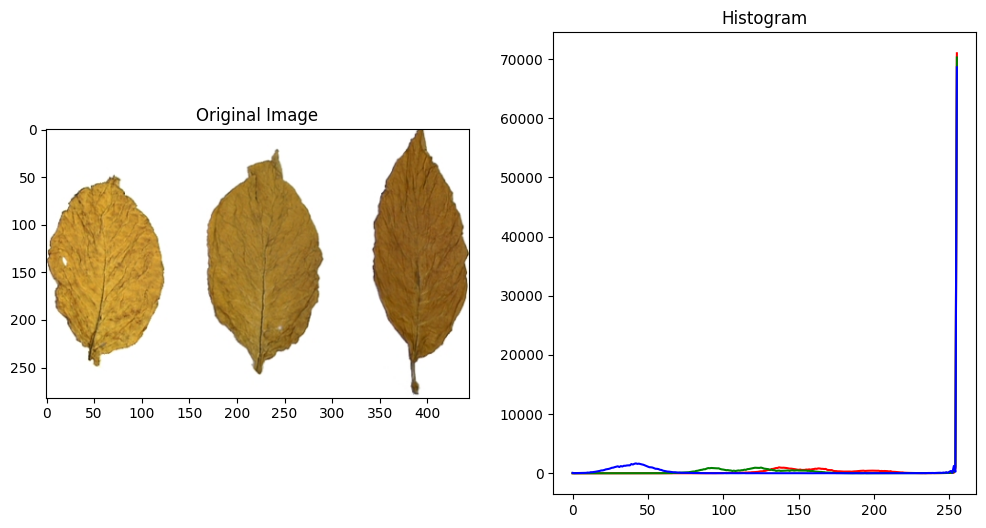

In [54]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(tobacco)
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.plot(hist_r, color='red', label='Red Channel')
plt.plot(hist_g, color='green', label='Green Channel')
plt.plot(hist_b, color='blue', label='Blue Channel')
plt.title('Histogram')

plt.show()

In [55]:
tobacco_gray = cv.cvtColor(tobacco, cv.COLOR_RGB2GRAY)
_, binary_tobacco = cv.threshold(tobacco_gray, 240, 255, cv.THRESH_BINARY_INV)

hist_r = cv.calcHist([r], [0], binary_tobacco, [256], [0, 256])
hist_g = cv.calcHist([g], [0], binary_tobacco, [256], [0, 256])
hist_b = cv.calcHist([b], [0], binary_tobacco, [256], [0, 256])

Menampilkan Tobacco binary inverted dan histogram

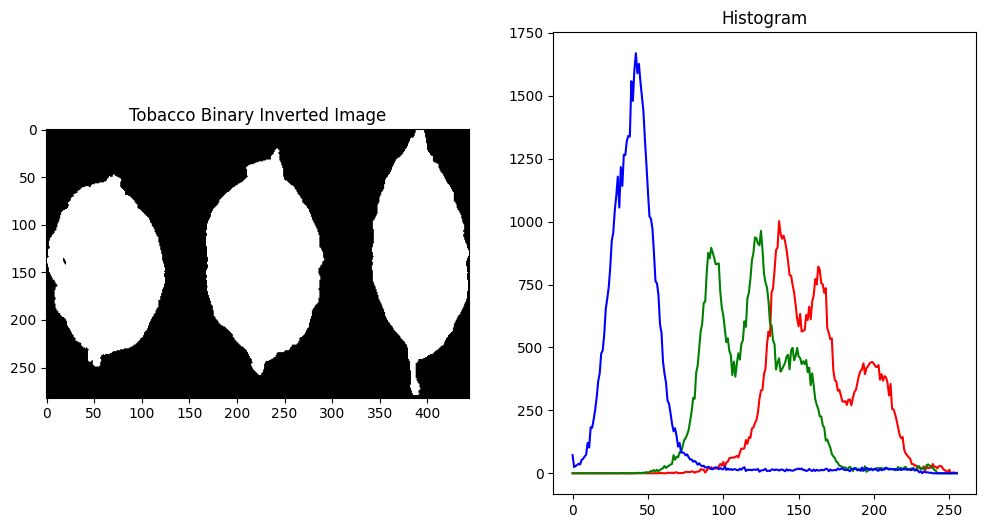

In [57]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(binary_tobacco, cmap='gray')
plt.title('Tobacco Binary Inverted Image')

plt.subplot(1, 2, 2)
plt.plot(hist_r, color='red', label='Red Channel')
plt.plot(hist_g, color='green', label='Green Channel')
plt.plot(hist_b, color='blue', label='Blue Channel')
plt.title('Histogram')

plt.show()

6. Lakukan segmentasi warna pada image "peppers.jpg", munculkan hanya warna yang
kuning saja.

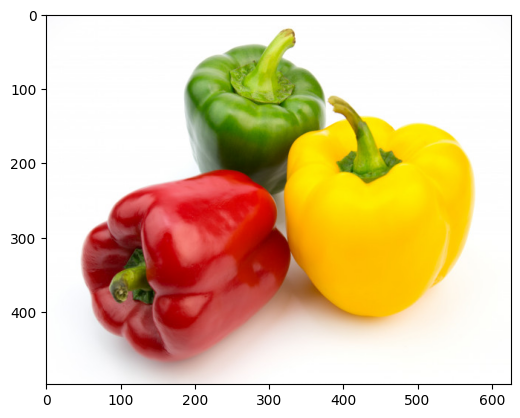

In [58]:
from sklearn.cluster import KMeans
image = cv.imread('/content/drive/MyDrive/Images/peppers.jpg')
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

plt.imshow(image)

In [59]:
pappers = image.astype('float32')
pixel_values = pappers.reshape((-1, 3))
K = 6
kmeans = KMeans(n_clusters=K, init = 'k-means++', random_state=42)
kmeans.fit(pixel_values)

KMeans(n_clusters=6, random_state=42)

In [62]:
labels = kmeans.labels_
centers = kmeans.cluster_centers_

yellow_cluster = None
yellow_rgb = np.array([255, 255, 0])
min_distance = float('inf')

for i, center in enumerate(centers):
    distance = np.linalg.norm(center - yellow_rgb)
    if distance < min_distance:
        min_distance = distance
        yellow_cluster = i

In [63]:
mask = (labels == yellow_cluster)
mask = mask.reshape(image.shape[:2])
white_bg = np.ones_like(image) * 255
segmented_image = np.where(mask[:, :, None], image, white_bg)


Menampilkan Citra dan segmented image

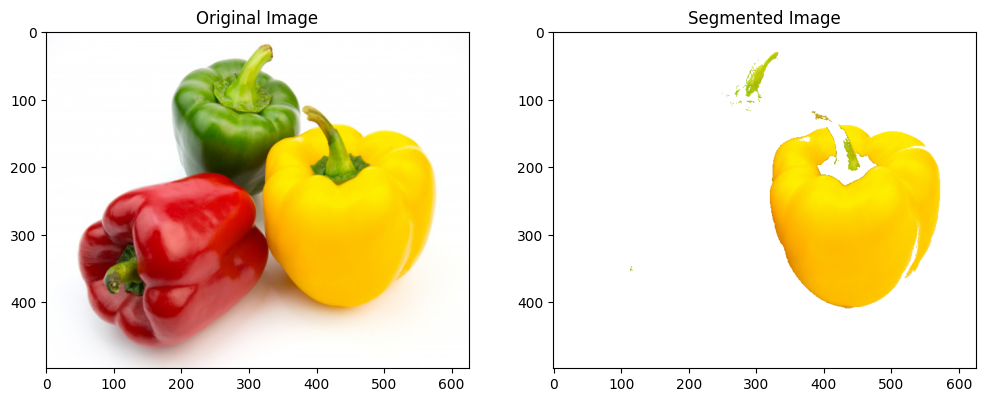

In [64]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(segmented_image)
plt.title('Segmented Image')

plt.show()

7. Buka File crossword.jpg. Dengan pengetahuan tentang thresholding yang sudah anda
pelajari. Lakukan thresholding biner dengan hasil terbaik menurut anda. Copas code
dan hasil image di modul ini.

In [ ]:
crossword = cv.imread('/content/drive/MyDrive/Images/crossword.jpg')
crossword_gray = cv.cvtColor(crossword, cv.COLOR_BGR2GRAY)

Menampilkan Citra

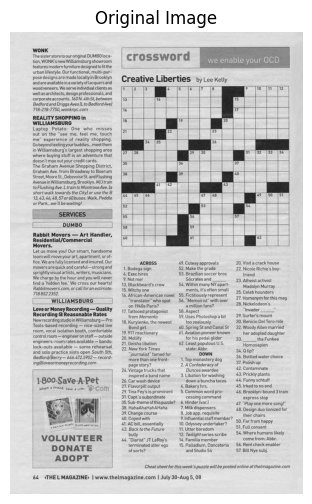

In [69]:
plt.figure(figsize=(12, 6))
plt.imshow(crossword_gray, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()

In [71]:
_, crossword_binary_threshold = cv.threshold(crossword_gray, 127, 255, cv.THRESH_BINARY)
_, crossword_binary_threshold_inv = cv.threshold(crossword_gray, 127, 255, cv.THRESH_BINARY_INV)
_, crossword_trunc_threshold = cv.threshold(crossword_gray, 127, 255, cv.THRESH_TRUNC)
_, crossword_tozero_threshold = cv.threshold(crossword_gray, 127, 255, cv.THRESH_TOZERO)
_, crossword_tozero_inv_threshold = cv.threshold(crossword_gray, 127, 255, cv.THRESH_TOZERO_INV)
_, crossword_otsu_threshold = cv.threshold(crossword_gray, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)
crossword_adaptive_mean_threshold = cv.adaptiveThreshold(crossword_gray, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 11, 2)
crossword_adaptive_gaussian_threshold = cv.adaptiveThreshold(crossword_gray, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 11, 2)

Menampilkan Citra dan Binary Threshold

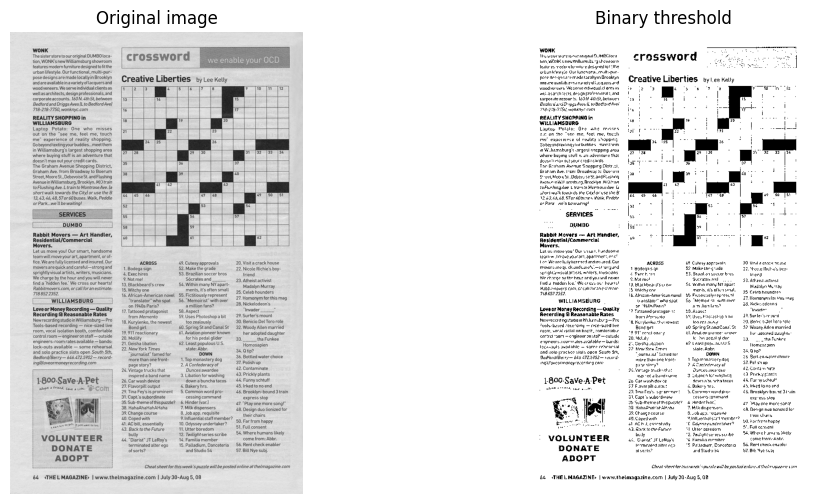

In [72]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(crossword_gray, cmap='gray')
plt.title('Original image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(crossword_binary_threshold, cmap='gray')
plt.title('Binary threshold')
plt.axis('off')
plt.show()

Menampilkan citra dan Binary inverted Threshold

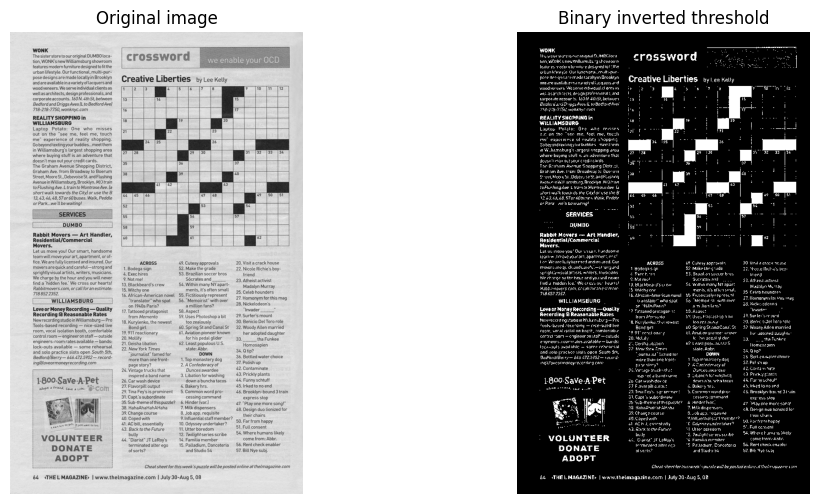

In [73]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(crossword_gray, cmap='gray')
plt.title('Original image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(crossword_binary_threshold_inv, cmap='gray')
plt.title('Binary inverted threshold')
plt.axis('off')
plt.show()

Menampilkan Citra dan Truncate Threshold

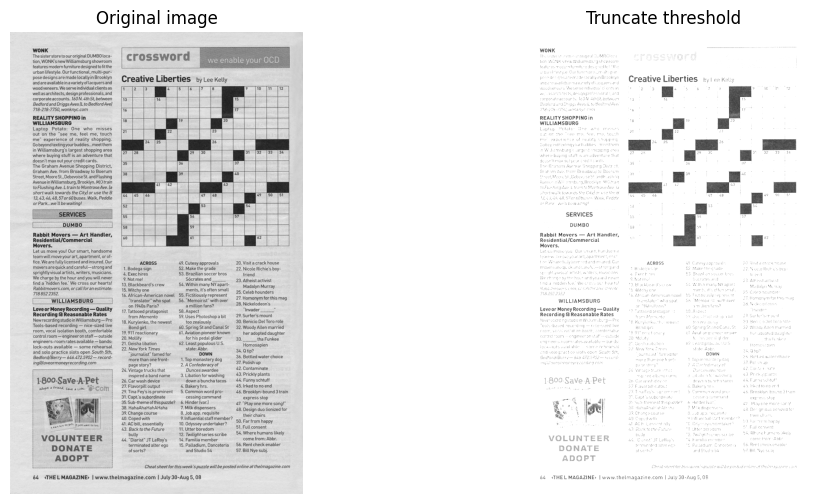

In [74]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(crossword_gray, cmap='gray')
plt.title('Original image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(crossword_trunc_threshold, cmap='gray')
plt.title('Truncate threshold')
plt.axis('off')
plt.show()

Menampilkan Citra dan to zero Threshold

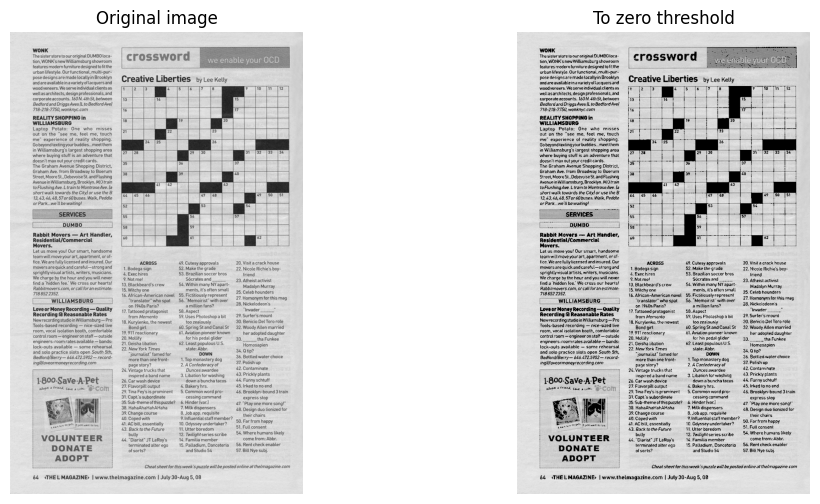

In [75]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(crossword_gray, cmap='gray')
plt.title('Original image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(crossword_tozero_threshold, cmap='gray')
plt.title('To zero threshold')
plt.axis('off')
plt.show()

Menampilkan Citra dan to zero inverted Threshold

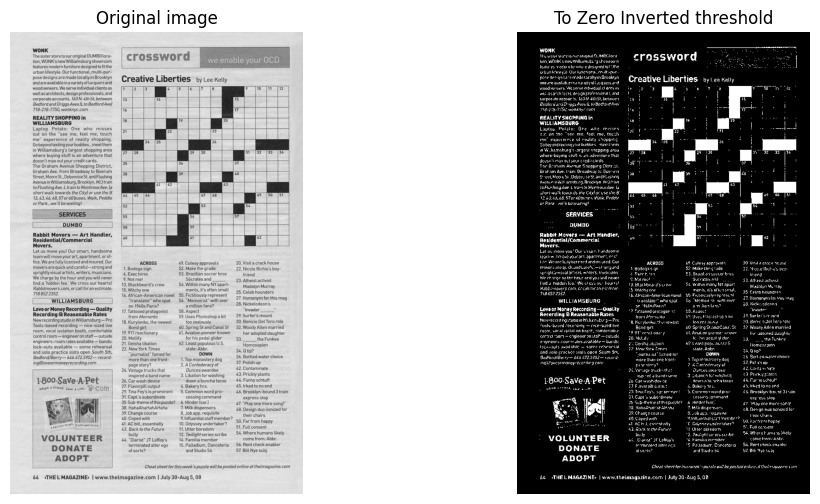

In [76]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(crossword_gray, cmap='gray')
plt.title('Original image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(crossword_binary_threshold_inv, cmap='gray')
plt.title('To Zero Inverted threshold')
plt.axis('off')
plt.show()

Menampilkan Citra dan Otsu Threshold

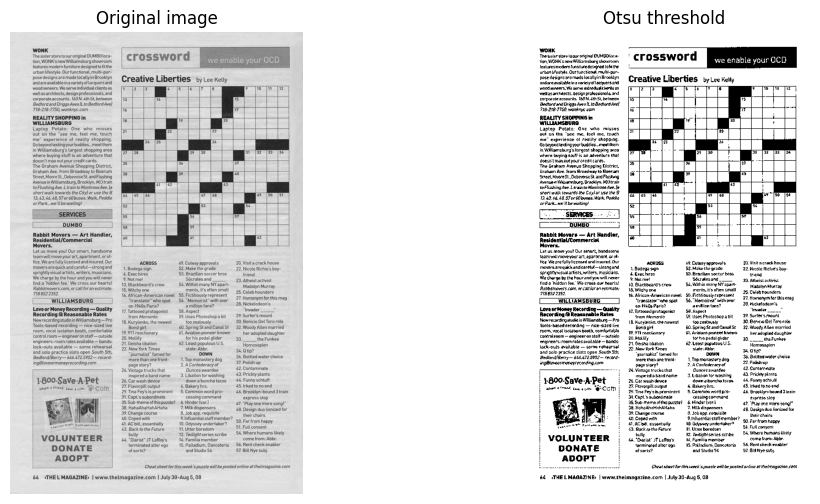

In [77]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(crossword_gray, cmap='gray')
plt.title('Original image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(crossword_otsu_threshold, cmap='gray')
plt.title('Otsu threshold')
plt.axis('off')
plt.show()

Menampilkan Citra dan Adaptive mean Threshold

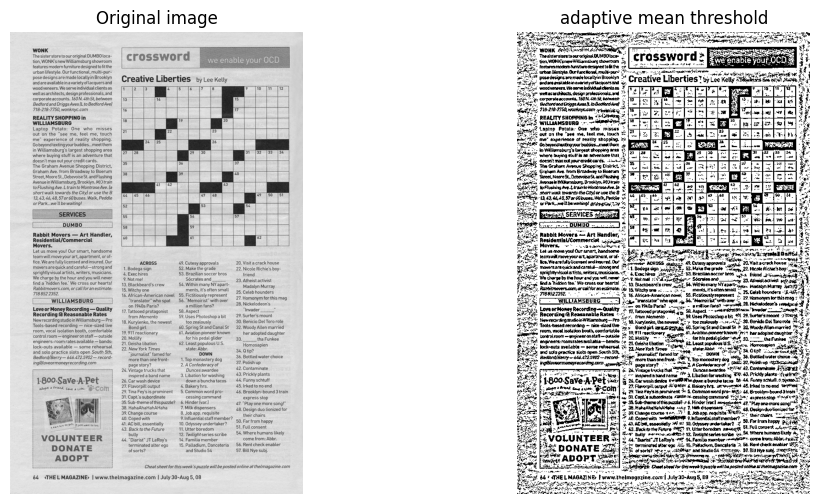

In [78]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(crossword_gray, cmap='gray')
plt.title('Original image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(crossword_adaptive_mean_threshold, cmap='gray')
plt.title('adaptive mean threshold')
plt.axis('off')
plt.show()

Menampilkan Citra dan Adaptive gaussian Threshold

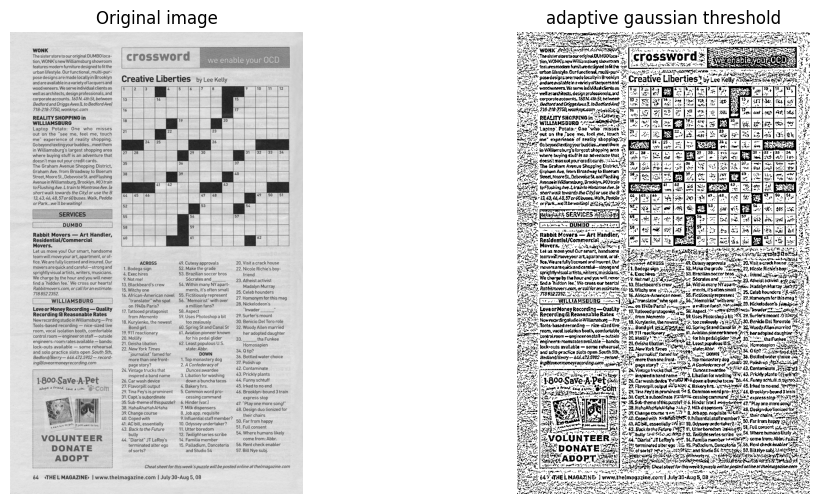

In [79]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(crossword_gray, cmap='gray')
plt.title('Original image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(crossword_adaptive_gaussian_threshold, cmap='gray')
plt.title('adaptive gaussian threshold')
plt.axis('off')
plt.show()

Dari beberapa percobaan threshold pada crossword, yang terbaik menurut saya adalah
To Zero Threshold, tampilannya seperti berikut

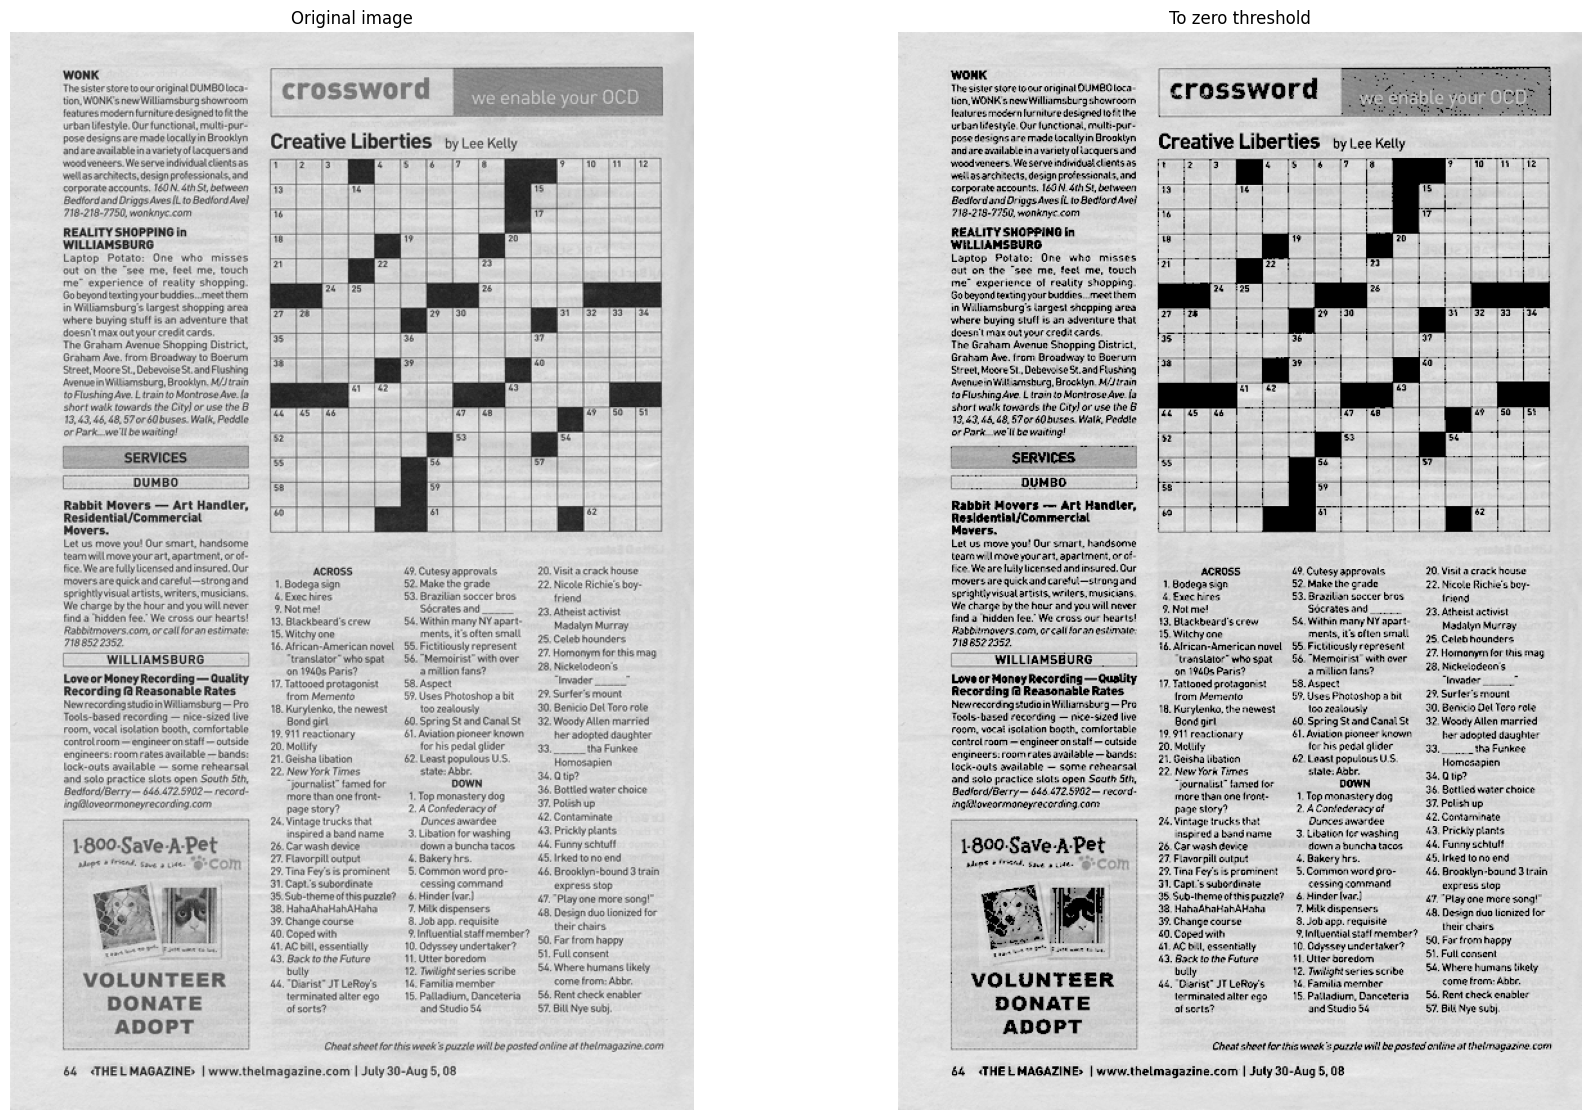

In [81]:
plt.figure(figsize=(21, 14))
plt.subplot(1, 2, 1)
plt.imshow(crossword_gray, cmap='gray')
plt.title('Original image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(crossword_tozero_threshold, cmap='gray')
plt.title('To zero threshold')
plt.axis('off')
plt.show()